ValueError: operands could not be broadcast together with shapes (31,) (38,) 

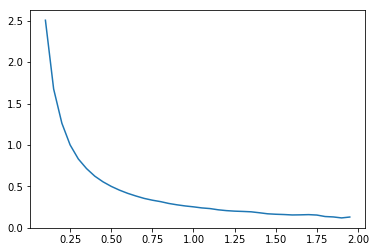

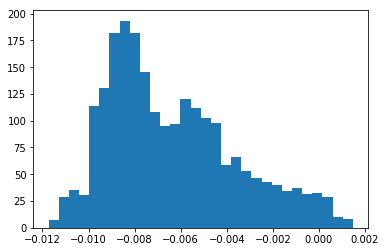

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## variational quantum monte carlo simulation

## initialize

N = 100000
alpha = np.arange(0.1, 2, 0.05)
sigma = 1/np.sqrt(2*alpha)

prob_dens = np.zeros([N,len(sigma)])
E_loc = np.zeros([N,len(sigma)])
E = np.zeros([len(sigma)])



def dens_function(alpha, x):
    density = np.sqrt(alpha/np.pi)*np.sqrt(alpha/np.pi)*np.exp(-2*alpha*x**2)
    return(density)

def local_energy(alpha,x):
    E_loc = alpha + (x**2)*(0.5-2*alpha**2)
    return(E_loc)

def normal_dis(sigma):
    prob_dens = np.random.normal(0, sigma, N)
    return(prob_dens)
    
def expectation_value(E_loc):
    E = (1/N)*np.sum(E_loc)
    return(E)

def vmc():
    for i in range(len(sigma)):
        prob_dens = normal_dis(sigma[i])
        E_loc[:,i] = local_energy(alpha[i], prob_dens)
        E[i] = expectation_value(E_loc[:,i])
        
    return(E)

def metropolis_algorithm(N, alpha):
    x = np.zeros(N)
    x[0] = 0.1
    h = 1/10000
    eta = np.random.uniform(0,1)
    for i in range(len(x)):
        x_trial = np.random.uniform(-h/2, h/2)
        x_trial = x[i-1] + x_trial
        r = dens_function(alpha, x_trial)/dens_function(alpha, x[i])
        if r >= 1:
            x[i] = x_trial
        else:
            if eta < r:
                x[i] = x_trial
            else:
                x[i] = x[i-1]
    return(x)

## run program

E_ground = vmc()


## plots

plt.figure()
plt.plot(alpha, E_ground)


## histogram probability distribution function

plt.figure()
count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
np.exp( - (bins)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()
print(sigma)

    




    
    


In [14]:
print(x)

[  4.62847941e-03   3.48250216e-03   2.31149501e-04  -3.98442053e-03
  -4.08234905e-03  -5.40143099e-03  -8.70484403e-03  -9.48294872e-03
  -1.32882293e-02  -1.76267414e-02  -2.11779189e-02  -2.15903344e-02
  -1.68201980e-02  -1.58420444e-02  -1.40838195e-02  -1.89623949e-02
  -1.80820710e-02  -1.54349721e-02  -1.92979169e-02  -2.04840962e-02
  -1.86494184e-02  -1.90841408e-02  -1.55463238e-02  -1.59465648e-02
  -1.87098782e-02  -1.80546526e-02  -1.94019079e-02  -1.69321596e-02
  -1.64413868e-02  -1.64422168e-02  -2.10715457e-02  -2.20307805e-02
  -2.30689886e-02  -1.96668313e-02  -2.19352815e-02  -2.52560205e-02
  -2.54632729e-02  -2.09846565e-02  -1.71374562e-02  -2.03024135e-02
  -2.06590055e-02  -2.27276170e-02  -2.25848494e-02  -2.55882746e-02
  -2.30743056e-02  -2.06340667e-02  -2.17414376e-02  -2.66024513e-02
  -2.42909262e-02  -2.17609676e-02  -2.00874331e-02  -1.61066139e-02
  -1.98463799e-02  -2.17936273e-02  -2.39509632e-02  -2.38272702e-02
  -2.44219935e-02  -2.85842714e-02